In [3]:
import os
import pandas as pd
import numpy as np
import ast
import re

In [5]:
!pip install scienceplots

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (6, 5)
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [7]:
# folder path
folder_path = "Theses_raw_data"

In [9]:
# text cleaning function
def clean_texts(text):
    try:
        data = ast.literal_eval(text)
        if isinstance(data, dict) and "Texts" in data:
            for item in data["Texts"]:
                if item.get("lang") == "en":
                    clean_text = item.get("text", "").strip()
                    clean_text = re.sub(r"<[^>]+>", " ", clean_text)
                    clean_text = re.sub(r"\s+", " ", clean_text).strip()  
                    clean_text = clean_text.lower() 
                    clean_text = re.sub(r"[^a-z\s]", "", clean_text)
                    return clean_text
    except (ValueError, SyntaxError):
        pass
    return text

In [13]:
dataframes = []

# File loop
for i in range(16):  
    file_path = os.path.join(folder_path, f"patent_chunk_{i}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Apply cleaning functions
        df["Titles"] = df["Titles"].apply(clean_texts)
        df["Abstracts"] = df["Abstracts"].apply(clean_texts)
        df["Claims"] = df["Claims"].apply(clean_texts)
        
        # Remove duplicates, NaN, Descriptions & Legal status col
        df = df.drop(columns=["Descriptions"], errors='ignore')
        df = df.drop(columns=["LegalStatus"], errors='ignore')
        df = df.dropna()
        df.drop_duplicates()
        
        dataframes.append(df)

# Concatenate df
final_df = pd.concat(dataframes, ignore_index=True)

In [14]:
# Display the final dataframe
final_df.head()

,CountryCode,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate
0,US,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation system for int...,"['A61B17/02', 'A61B17/16', 'A61B34/20', 'A61B3...","['A61B17/1675', 'A61B2034/2055', 'A61B34/20', ...",ORTHOSOFT ULC,20201216
1,US,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation method for in...,"['A61B17/16', 'A61B34/20', 'A61B34/30']","['A61B17/154', 'A61B17/1675', 'A61B2034/2048',...",ORTHOSOFT ULC,20201216
2,US,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope ...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524
3,US,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope...,"['A61B34/10', 'A61B34/20', 'A61B34/32']","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524
4,US,US20240594287,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,canceled a method for controlling a roboti...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524


In [14]:
print(final_df.describe())
print(final_df.info())

       EarliestPriorityDate
count          7.735300e+04
mean           2.018082e+07
std            2.119088e+04
min            2.015010e+07
25%            2.016100e+07
50%            2.018052e+07
75%            2.020012e+07
max            2.024083e+07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77353 entries, 0 to 77352
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CountryCode             77353 non-null  object
 1   ApplicationNumber       77353 non-null  object
 2   Titles                  77353 non-null  object
 3   Abstracts               77353 non-null  object
 4   Claims                  77353 non-null  object
 5   IPCs                    77353 non-null  object
 6   CPCs                    77353 non-null  object
 7   ProbablePatentAssignee  77353 non-null  object
 8   EarliestPriorityDate    77353 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.3+ MB
None


In [15]:
#Date Convert
final_df['EarliestPriorityDate'] = final_df['EarliestPriorityDate'].astype(int)
final_df['EarliestPriorityDate'] = pd.to_datetime(final_df['EarliestPriorityDate'].astype(str), format='%Y%m%d')

In [16]:
unique_CountryCode = final_df['CountryCode'].unique()
print(unique_CountryCode)

['US']


In [17]:
 final_df = final_df.drop(columns=["CountryCode"], errors='ignore')

In [18]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51969
Number of unique Abstracts: 43217
Number of unique Claims: 76434


In [19]:
final_df["claim_length"] = final_df.Claims.apply(lambda x: len(x.split(" ")))
final_df["abstract_length"] = final_df.Abstracts.apply(lambda x: len(x.split(" ")))

In [20]:
final_df.head()

,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate,claim_length,abstract_length
0,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation system for int...,"['A61B17/02', 'A61B17/16', 'A61B34/20', 'A61B3...","['A61B17/1675', 'A61B2034/2055', 'A61B34/20', ...",ORTHOSOFT ULC,2020-12-16,710,113
1,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation method for in...,"['A61B17/16', 'A61B34/20', 'A61B34/30']","['A61B17/154', 'A61B17/1675', 'A61B2034/2048',...",ORTHOSOFT ULC,2020-12-16,1816,113
2,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope ...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1012,105
3,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope...,"['A61B34/10', 'A61B34/20', 'A61B34/32']","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1038,105
4,US20240594287,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,canceled a method for controlling a roboti...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,725,105


In [47]:
final_df = final_df.sort_values(by="claim_length", ascending=False)
final_df = final_df.drop_duplicates(subset="ApplicationNumber", keep="first")
final_df = final_df.drop_duplicates(subset="Claims", keep="first")

In [49]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51597
Number of unique Abstracts: 42114
Number of unique Claims: 51597


In [39]:
print(f"Avg. number of words in Claims: {np.mean(final_df.claim_length):.2f}")
print(f"Avg. number of words in Abstracts: {np.mean(final_df.abstract_length):.2f}")
print(f"Total number of words in Claims: {final_df.claim_length.sum()}")
print(f"Total number of words in Abstracts: {final_df.abstract_length.sum()}")

Avg. number of words in Claims: 1187.22
Avg. number of words in Abstracts: 114.09
Total number of words in Claims: 61698734
Total number of words in Abstracts: 5928898


In [22]:
ApplicationNumber_counts = final_df['ApplicationNumber'].value_counts()
repeating_ApplicationNumber = ApplicationNumber_counts[ApplicationNumber_counts > 1].index
repeating = final_df[final_df['ApplicationNumber'].isin(repeating_ApplicationNumber)]
print(repeating)

      ApplicationNumber                                             Titles  \
0         US20210552492  knee arthroplasty validation and gap balancing...   
1         US20210552492  knee arthroplasty validation and gap balancing...   
2         US20230466010  systems and methods for selfalignment and adju...   
3         US20230466010  systems and methods for selfalignment and adju...   
5         US20210617360  temporally balanced multimode master imaging s...   
...                 ...                                                ...   
77210     US20150598480            imaging based instrument event tracking   
77267     US20160050350                               pliable camera cover   
77268     US20160050350                               pliable camera cover   
77305     US20150624857             ophthalmic tool for eye imaging device   
77306     US20150624857             ophthalmic tool for eye imaging device   

                                               Abstracts  \
0  

In [23]:
_76088 = final_df.loc[0,'Claims']
print(_76088)
#sample inspection of claim length and content

 a knee arthroplasty validation system for intraoperative validation of cut surfaces the system comprising a robotic surgical device including processing circuitry the robotic surgical device to assist in a tibiofemoral joint resection of a patient tibia or a patient femur the tibiofemoral joint resection including a horizontal resection and a vertical resection a solid knee arthroplasty validation device positioned to contact the horizontal resection and the vertical resection the solid knee arthroplasty validation device including a horizontal resection validation surface a top validation surface opposite from the horizontal resection validation surface a vertical resection validation surface orthogonal to the horizontal resection validation surface the vertical resection validation surface to contact and validate the vertical resection a distal portion to validate a posterior tibial plateau resection gap a proximate portion to validate an anterior tibial plateau resection gap and an

In [24]:
_76089 = final_df.loc[1,'Claims']
print(_76089)

  a knee arthroplasty validation method for intraoperative validation of cut surfaces the method comprising outputting control instructions to cause a robotic surgical device to assist in a tibiofemoral joint resection of a patient tibia or a patient femur the tibiofemoral joint resection including a horizontal resection positioning a knee arthroplasty validation device to contact the horizontal resection the knee arthroplasty validation device including a horizontal resection validation surface and an optical tracker fixedly attached to the knee arthroplasty validation device validating using processing circuitry of the robotic surgical device the horizontal resection based on a tracked validation position of the optical tracker and triggering an update of a display to indicate completion of the validation   the method of claim  further including validating using processing circuitry of the robotic surgical device a vertical resection based on the tracked validation position of the op

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51597 entries, 10589 to 35262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       51597 non-null  object        
 1   Titles                  51597 non-null  object        
 2   Abstracts               51597 non-null  object        
 3   Claims                  51597 non-null  object        
 4   IPCs                    51597 non-null  object        
 5   CPCs                    51597 non-null  object        
 6   ProbablePatentAssignee  51597 non-null  object        
 7   EarliestPriorityDate    51597 non-null  datetime64[ns]
 8   claim_length            51597 non-null  int64         
 9   abstract_length         51597 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 4.3+ MB


In [57]:
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")
print(f"Number of unique Applications: {len(final_df.ApplicationNumber.unique())}")

Number of unique Abstracts: 42114
Number of unique Claims: 51597
Number of unique Applications: 51597


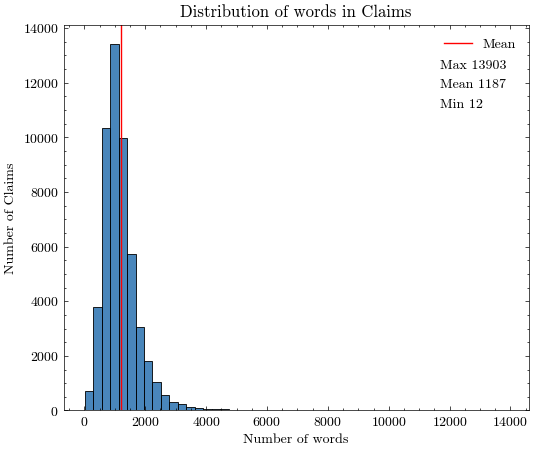

In [139]:
sns.histplot(final_df.claim_length, bins = 50)
plt.axvline(np.mean(final_df.claim_length), color = "r",label = "Mean")
plt.text(11700, 12500, f"Max {max(final_df.claim_length)}")
plt.text(11700, 11100, f"Min {min(final_df.claim_length)}")
plt.text(11700, 11800, f"Mean {np.mean(final_df.claim_length):.0f}")
plt.title("Distribution of words in Claims")
plt.xlabel("Number of words")
plt.ylabel("Number of Claims")
plt.legend()
plt.show()

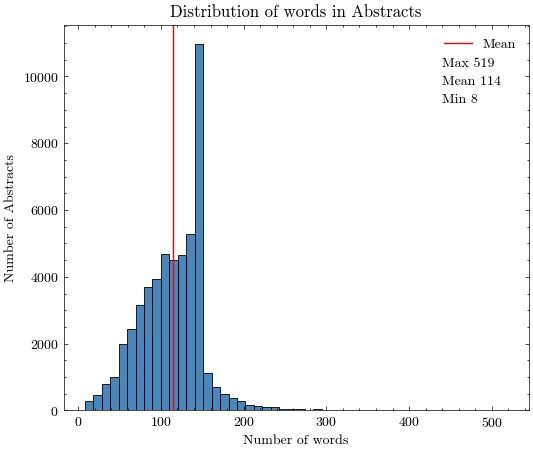

In [107]:
sns.histplot(final_df.abstract_length, bins = 50)
plt.axvline(np.mean(final_df.abstract_length), color = "r", label = "Mean")
plt.text(440, 10300, f"Max {max(final_df.abstract_length)}")
plt.text(440, 9200, f"Min {min(final_df.abstract_length)}")
plt.text(440, 9750, f"Mean {np.mean(final_df.abstract_length):.0f}")
plt.title("Distribution of words in Abstracts")
plt.xlabel("Number of words")
plt.ylabel("Number of Abstracts")
plt.legend()
plt.show()

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51597 entries, 10589 to 35262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       51597 non-null  object        
 1   Titles                  51597 non-null  object        
 2   Abstracts               51597 non-null  object        
 3   Claims                  51597 non-null  object        
 4   IPCs                    51597 non-null  object        
 5   CPCs                    51597 non-null  object        
 6   ProbablePatentAssignee  51597 non-null  object        
 7   EarliestPriorityDate    51597 non-null  datetime64[ns]
 8   claim_length            51597 non-null  int64         
 9   abstract_length         51597 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 4.3+ MB


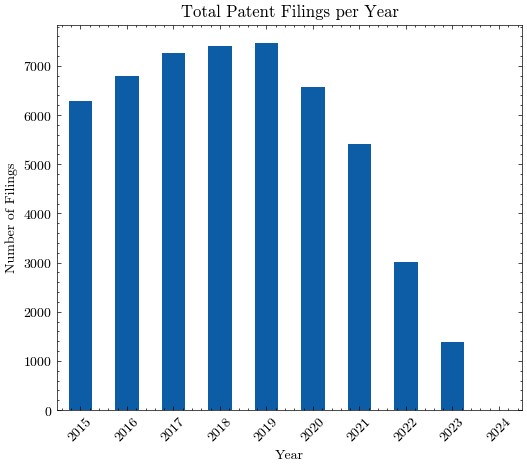

In [61]:
# Distribution if fillings per year
final_df['Year'] = final_df['EarliestPriorityDate'].dt.year
total_filings_per_year = final_df.groupby('Year')['ApplicationNumber'].count()

total_filings_per_year.plot(kind='bar')
plt.title('Total Patent Filings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Filings')
plt.xticks(rotation=45)
plt.show()

In [62]:
company_patent_counts = final_df.groupby('ProbablePatentAssignee')['ApplicationNumber'].count().reset_index()
sorted_companies = company_patent_counts.sort_values(by='ApplicationNumber', ascending=False)
top_50_companies = sorted_companies.head(50)

top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)

print(top_50_companies)

                                 ProbablePatentAssignee  No of applications
6003                                       OLYMPUS CORP                2053
2963                             FUJIFILM HOLDINGS CORP                1524
1706                                     CILAG GMBH INT                1448
6407                                PHILIPS KONINKLL NV                1392
1938                                        COVIDIEN LP                1335
1402                                          CANON INC                 990
1098                        BIOSENSE WEBSTER ISRAEL LTD                 835
4005                  INTUITIVE SURGICAL OPERATIONS INC                 793
1226                       BOSTON SCIENTIFIC SCIMED INC                 689
7456                            SIEMENS HEALTHINEERS AG                 479
744                                    AURIS HEALTH INC                 376
5138                                      MEDTRONIC INC                 356
3059        

/var/folders/v1/967x2jt96y7374fqc3v404pc0000gn/T/ipykernel_52666/1271430457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)


In [63]:
def split_codes(df, col_name):
    # Split the codes by delimiter and explode into separate rows
    exploded_df = df[col_name].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
    exploded_df = exploded_df.str.replace(r"[\[\]']", "", regex=True)
    return exploded_df.to_frame(name=col_name)

# Create new DataFrames for IPC and CPC codes
ipc_df = split_codes(final_df, 'IPCs')
cpc_df = split_codes(final_df, 'CPCs')

# Display the exploded DataFrames
print("\nExploded IPC DataFrame:")
print(ipc_df)

print("\nExploded CPC DataFrame:")
print(cpc_df)



Exploded IPC DataFrame:
              IPCs
10589    A61B34/10
10589    A61B34/20
72634  A61K31/7105
72634    A61M31/00
72634    C12N15/11
...            ...
15036    G06Q10/10
15036    G16H40/20
35262    A61B34/20
35262    A61B34/30
35262    A61B50/13

[242436 rows x 1 columns]

Exploded CPC DataFrame:
                 CPCs
10589    A61B2034/107
10589   A61B2034/2051
10589   A61B2034/2055
10589   A61B2034/2059
10589   A61B2034/2061
...               ...
35262       A61B34/20
35262       A61B34/30
35262       A61B50/13
35262    A61M2209/084
35262    A61M2209/086

[812112 rows x 1 columns]


In [64]:
ipc_category_counts = ipc_df['IPCs'].value_counts()
cpc_category_counts = cpc_df['CPCs'].value_counts()

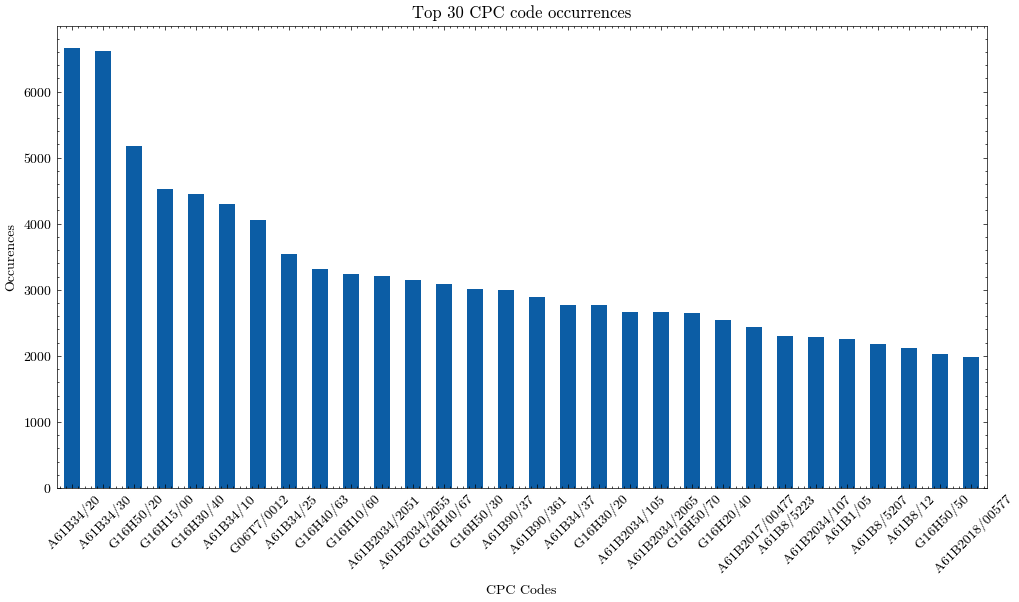

In [65]:
plot = cpc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 CPC code occurrences')
plt.xlabel('CPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

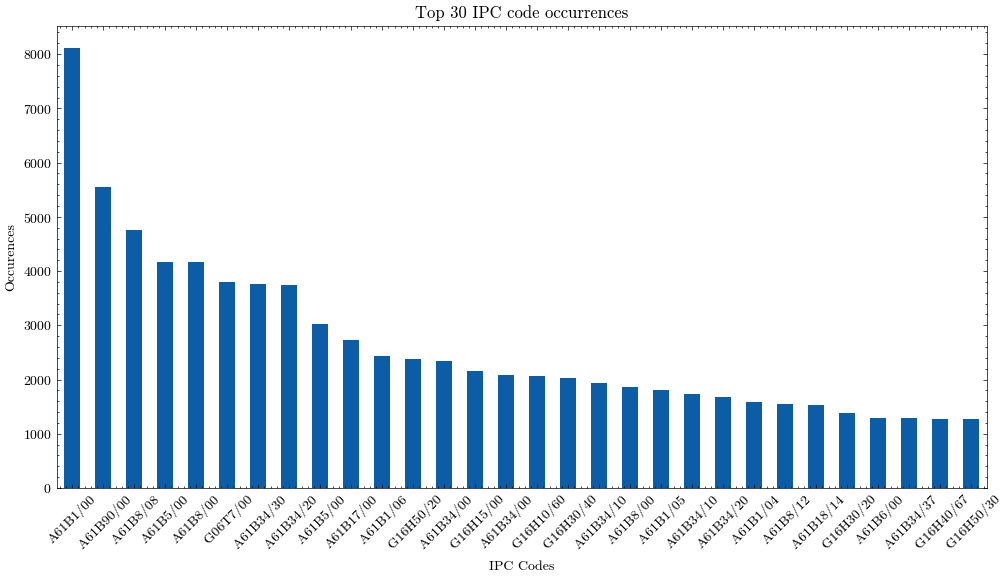

In [66]:
plot = ipc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 IPC code occurrences')
plt.xlabel('IPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

In [67]:
final_df.to_csv("text.csv", index=False)

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51597 entries, 10589 to 35262
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       51597 non-null  object        
 1   Titles                  51597 non-null  object        
 2   Abstracts               51597 non-null  object        
 3   Claims                  51597 non-null  object        
 4   IPCs                    51597 non-null  object        
 5   CPCs                    51597 non-null  object        
 6   ProbablePatentAssignee  51597 non-null  object        
 7   EarliestPriorityDate    51597 non-null  datetime64[ns]
 8   claim_length            51597 non-null  int64         
 9   abstract_length         51597 non-null  int64         
 10  Year                    51597 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 6.7+ MB
